**Traffic Flow revisited**

**Better flux model**

Typical conservation law: $$\frac{\partial \rho}{\partial t} + \frac{\partial F}{\partial x} = 0$$

F is the flux and $F = \rho u$, flux equals density times velocity.

Approx linear relation between traffic speed and traffic density
$$F(\rho) = \rho u_{max} (1 - \frac{\rho}{\rho_{max}})$$

The flux model meets the two requirements based on a qualitative view of traffic flow that:

1. $u \rightarrow u_{max}  and  F \rightarrow when \rho \rightarrow 0$
2. $u \rightarrow 0  as  \rho \rightarrow \rho_{max}$

This leads to some unrealistic or improbable results.  For example if the traffic speed is a linear funciton of density, then the flux function will be quadratic and the maximum flux will occur when $\rho^{\star} = \rho_{max} /2$ which corresponds to a traffic speed of $u_{max} /2$

Need to find an ideal traffic speed $u^{\star}$ that corresponds to an ideal traffic density $\rho^{\star}$ which results in the maximum traffic flux: $$F_{max} = \rho^{\star} u^{\star}$$

We can improve the initial flux by using this observation.  We can try to introduce a flux model that is cubic in $\rho$ instead of quadratic:  $$F(\rho) = u_{max} \rho (1 - A \rho - B \rho^2)$$

This new model still meets the first criterion $F \rightarrow 0$ when $\rho \rightarrow 0$

We can impose the following conditions:

* When $\rho = \rho_{max}$ traffic flux goes to zero: $$F(\rho_{max}) = 0 = u_{max} \rho_{max} (1 - A \rho_{max} - B \rho_{max} ^2 )$$

* Maximum flux occurs when $\rho = \rho^{\star} and F'(\rho^{\star}) = 0$ : $$F'(\rho^{star}) = 0 = u_{max} ( 1 - 2A \rho^{\star} - 3B(\rho^{\star})^2)$$

* $u^{\star}$ is obtained when $\rho = \rho^{\star}$ : $$u^{\star} = u_{max} (1 - A \rho^{\star} - B (\rho^{\star})^2)$$

We have three equations and four unknowns now, but in practice the ideal traffic speed could be obtained for a given road by observations.  Similarly to $u_{max}$ and $\rho_{max}$ it will be taken as a parameter.

**Solving the new flux Equation**

Gotta use Sympy and LaTeX printing.

In [1]:
import sympy
sympy.init_printing()

u_max, u_star, rho_max, rho_star, A, B = sympy.symbols('u_max u_star rho_max rho_star A B')

In [10]:
eq1 = sympy.Eq( 0, u_max*rho_max*(1 - A*rho_max - B*rho_max**2))
eq2 = sympy.Eq( 0, u_max*(1 - 2*A*rho_star - 3*B*rho_star**2))
eq3 = sympy.Eq( u_star, u_max*(1 - A*rho_star - B*rho_star**2))

In [11]:
eq1

In [12]:
eq2

In [13]:
eq3

In [14]:
eq4 = sympy.Eq(eq2.lhs - 3*eq3.lhs, eq2.rhs - 3*eq3.rhs)
eq4

In [15]:
eq4.simplify()

In [16]:
eq4

In [17]:
eq4.expand()
#Expand's purpose is to expand bracketed factors in expressions and group powers of symbols.

In [18]:
rho_sol = sympy.solve(eq4,rho_star)[0]
rho_sol

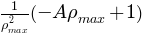

In [19]:
B_sol = sympy.solve(eq1,B)[0]
B_sol

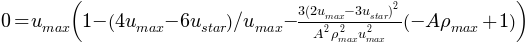

In [20]:
quadA = eq2.subs([(rho_star, rho_sol), (B,B_sol)])
quadA

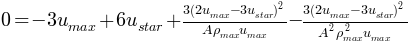

In [21]:
quadA.simplify()

In [22]:
A_sol = sympy.solve(quadA, A)

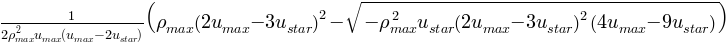

In [23]:
A_sol[0]

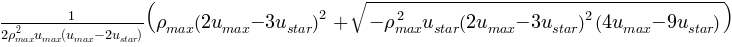

In [24]:
A_sol[1]

We now have both solutions to the quadratic.  We have to select the positive root.

We'll use the numerical values for $\rho_{max}$ and $u_{max}$ from lesson 1, but will have to have a value for $u^{\star}$ which should be experimentally observed in a given road.  We'll go with $u^{\star} = 0.7 u_{max}$ which would give us 84 km/h for a highway with a 120 km/h speed limit.

Need to numerically evaluate the solutions for A using the following values:
$$\rho_{max} = 10.0$$
$$u_{max} = 1.0$$
$$u^{\star} = 0.7$$

Need to evaluate the numerical result for each root of A using the evalf() function where you pass the numerical subsitution as an argument.

In [25]:
aval = A_sol[0].evalf(subs={u_star: 0.7, u_max:1.0, rho_max:10.0})
aval

In [26]:
A_sol[1].evalf(subs={u_star: 0.7, u_max:1.0, rho_max:10.0})

In [27]:
bval = B_sol.evalf(subs={rho_max:10.0, A:aval})
bval

In [28]:
sympy.init_printing(use_latex=False)

Going to look at the green light again using the new traffic-flux equation.

First need to switch rho_max and u_max from sympy to floats

In [29]:
print (type(rho_max), type(u_max))

<class 'sympy.core.symbol.Symbol'> <class 'sympy.core.symbol.Symbol'>


In [30]:
rho_max = 10.
u_max = 1.